Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# read dataset
train=pd.read_csv("/content/train_v9rqX0R.csv")
train_original=pd.read_csv("/content/train_v9rqX0R.csv")
test=pd.read_csv("/content/test_AbJTz2l.csv")
test_original=pd.read_csv("/content/test_AbJTz2l.csv")

In [ ]:
temp=train
for col in train.columns:
  temp=temp.drop(col,axis=1)
temp['Item_Weight']=train.Item_Weight
temp['Outlet_Size']=train.Outlet_Size
temp['Outlet_Establishment_Year']=train.Outlet_Establishment_Year
temp.groupby('Outlet_Size').mean().loc['Medium']


Item_Weight                    12.895420
Outlet_Establishment_Year    1997.635875
Name: Medium, dtype: float64

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#First we will deal with missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:

temp.head(20)

,Item_Weight,Outlet_Size,Outlet_Establishment_Year
0,9.300,Medium,1999
1,5.920,Medium,2009
2,17.500,Medium,1999
3,19.200,NaN,1998
4,8.930,High,1987
5,10.395,Medium,2009
6,13.650,High,1987
7,NaN,Medium,1985
8,16.200,NaN,2002
9,19.200,NaN,2007


In [ ]:
temp.groupby('Outlet_Size').mean().loc['Medium']

Item_Weight                    12.895420
Outlet_Establishment_Year    1997.635875
Name: Medium, dtype: float64

In [ ]:
temp.groupby('Outlet_Size').mean().loc['High']

Item_Weight    13.006148
Name: High, dtype: float64

In [ ]:
temp.groupby('Outlet_Size').mean().loc['Small']

Item_Weight    12.848075
Name: Small, dtype: float64

In [ ]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


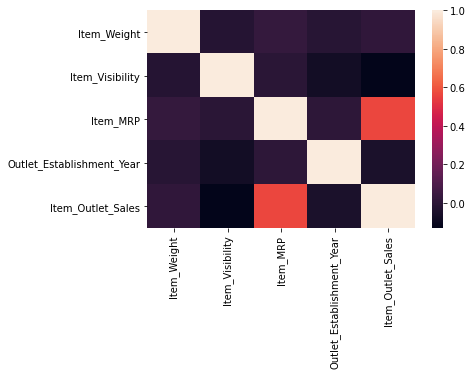

In [ ]:
sns.heatmap(train.corr())

In [ ]:
train.Item_Visibility.replace(0,np.NaN,inplace=True)
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

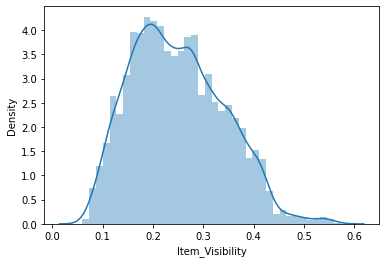

In [ ]:
temp['Item_Visibility']=train.Item_Visibility

sns.distplot(temp.Item_Visibility**(0.5))
plt.show

In [ ]:
print(min(train.Item_Visibility))

0.003574698


In [ ]:
train['Weight_random']=train.Item_Weight
rand_sam=train["Item_Weight"].dropna().sample(train["Item_Weight"].isnull().sum(),random_state=0)
rand_sam.index=train[train["Item_Weight"].isnull()].index
train.loc[train["Item_Weight"].isnull(),"Weight_random"]=rand_sam

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

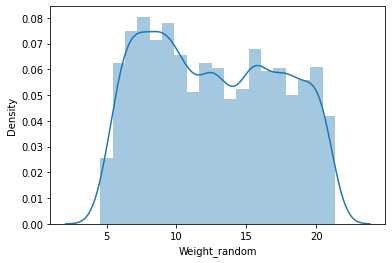

In [ ]:
test['Weight_random']=test.Item_Weight
rand_sam=test["Item_Weight"].dropna().sample(test["Item_Weight"].isnull().sum(),random_state=0)
rand_sam.index=test[test["Item_Weight"].isnull()].index
test.loc[test["Item_Weight"].isnull(),"Weight_random"]=rand_sam
sns.distplot(test.Weight_random)
plt.show

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Weight_random                   0
dtype: int64

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Weight_random                   0
dtype: int64

In [ ]:
temp["Outlet_Establishment_Year"]=train.Outlet_Establishment_Year
temp.Outlet_Size=train.Outlet_Size

<function matplotlib.pyplot.show>

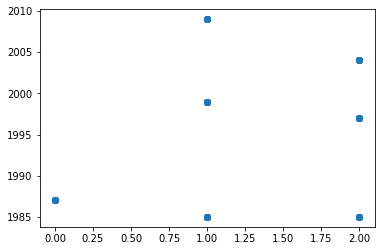

In [ ]:
plt.scatter(temp.Outlet_Size,temp.Outlet_Establishment_Year)
plt.show

In [ ]:
train.Item_Visibility.isnull().sum()

526

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

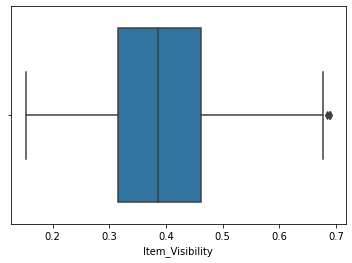

In [ ]:
sns.boxplot(temp.Item_Visibility**(1/3))
plt.show

In [ ]:
temp.head

<bound method NDFrame.head of       Item_Weight Outlet_Size  Outlet_Establishment_Year  Item_Visibility
0           9.300      Medium                       1999         0.016047
1           5.920      Medium                       2009         0.019278
2          17.500      Medium                       1999         0.016760
3          19.200         NaN                       1998              NaN
4           8.930        High                       1987              NaN
...           ...         ...                        ...              ...
8518        6.865        High                       1987         0.056783
8519        8.380         NaN                       2002         0.046982
8520       10.600       Small                       2004         0.035186
8521        7.210      Medium                       2009         0.145221
8522       14.800       Small                       1997         0.044878

[8523 rows x 4 columns]>

In [ ]:
temp.columns

Index(['Item_Weight', 'Outlet_Size', 'Outlet_Establishment_Year',
       'Item_Visibility'],
      dtype='object')

In [ ]:
temp.isnull().sum()

Item_Weight                  1463
Outlet_Size                  2410
Outlet_Establishment_Year       0
Item_Visibility               526
dtype: int64

In [ ]:
temp1=temp
temp1=temp1.drop('Item_Weight',axis=1)
temp1=temp1.drop('Item_Visibility',axis=1)
temp1.Item_Weight=train.Item_Weight

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [ ]:
temp1.isnull().sum()

Outlet_Size                  2410
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
temp1.Outlet_Size.fillna(0,inplace=True)
data1=temp1[temp1.Outlet_Size!=0]
data2=temp1[temp1.Outlet_Size==0]
temp1.head

<bound method NDFrame.head of      Outlet_Size  Outlet_Establishment_Year
0         Medium                       1999
1         Medium                       2009
2         Medium                       1999
3              0                       1998
4           High                       1987
...          ...                        ...
8518        High                       1987
8519           0                       2002
8520       Small                       2004
8521      Medium                       2009
8522       Small                       1997

[8523 rows x 2 columns]>

In [ ]:
test.Outlet_Size=test.Outlet_Size.fillna(0)
for i in range(0,5681):
  if test.Outlet_Size[i]==0:
   test.Outlet_Size[i]=model.predict([[test.Outlet_Establishment_Year[i]]])[0]


In [ ]:
train_x=data1.drop('Outlet_Size',axis=1)
train_y=data1.Outlet_Size


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7) 
model.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
model.predict([[2004]])[0]



'Small'

In [ ]:
temp1.head

<bound method NDFrame.head of      Outlet_Size  Outlet_Establishment_Year
0         Medium                       1999
1         Medium                       2009
2         Medium                       1999
3              0                       1998
4           High                       1987
...          ...                        ...
8518        High                       1987
8519           0                       2002
8520       Small                       2004
8521      Medium                       2009
8522       Small                       1997

[8523 rows x 2 columns]>

In [ ]:
for i in range(0,8523):
  if temp1.Outlet_Size[i]==0:
    temp1.Outlet_Size[i]=model.predict([[temp1.Outlet_Establishment_Year[i]]])[0]

In [ ]:
temp1.Outlet_Size.value_counts()

Small     3872
Medium    3719
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Weight_random                float64
dtype: object

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Weight_random                   0
dtype: int64

In [ ]:
mean=(train.Item_Visibility**(1/2)).mean()
print(mean)

0.24908126828877755


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


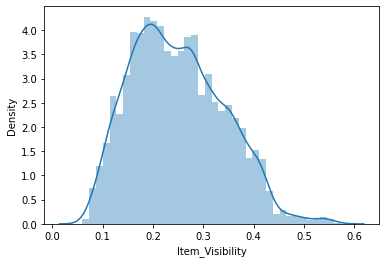

In [ ]:
sns.distplot((train.Item_Visibility)**(1/2))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


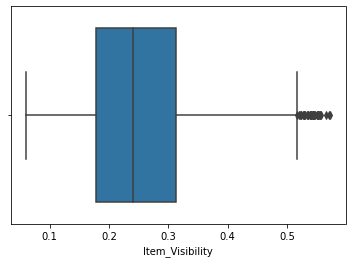

In [ ]:
sns.boxplot(train.Item_Visibility**(1/2))

In [ ]:
train.Item_Visibility=train_original.Item_Visibility
train.Item_Visibility.replace(0,np.NaN,inplace=True)
extreme=train.Item_Visibility.mean()+3*train.Item_Visibility.std()
print(extreme)
train.Item_Visibility.fillna(extreme,inplace=True)
train.Item_Visibility=(train.Item_Visibility)**(1/2)
max(train.Item_Visibility)

0.22140451139549888


0.5730540532968945

In [ ]:
test.Item_Visibility=test_original.Item_Visibility
test.Item_Visibility.replace(0,np.NaN,inplace=True)
extreme=test.Item_Visibility.mean()+3*test.Item_Visibility.std()
print(extreme)
test.Item_Visibility.fillna(extreme,inplace=True)
test.Item_Visibility=(train.Item_Visibility)**(1/2)

0.2199166669180591


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


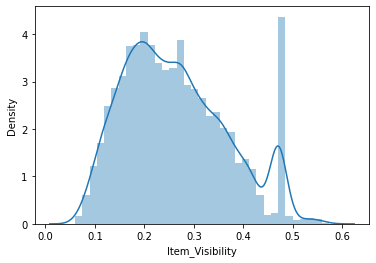

In [ ]:
sns.distplot(train.Item_Visibility)

0.7389734398451067


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


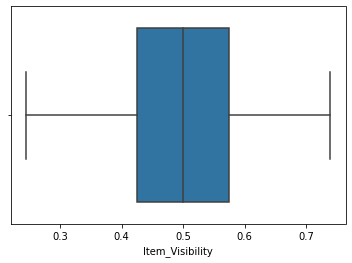

In [ ]:
print(max(test.Item_Visibility))
sns.boxplot(test.Item_Visibility)

In [ ]:
data=train.Item_Visibility
med=train.loc[train['Item_Visibility']<0.55,'Item_Visibility'].median()
data=np.where(data>0.55,med,data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


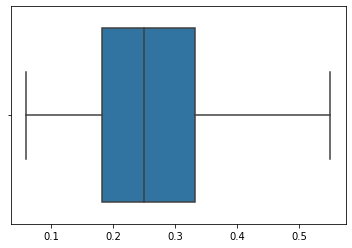

In [ ]:
train.Item_Visibility=data
sns.boxplot(data)

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Weight_random                0
dtype: int64

In [ ]:
train=train.drop('Item_Weight',axis=1)

In [ ]:
train.Outlet_Size=temp1.Outlet_Size

In [ ]:
test.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Weight_random                0
dtype: int64

In [ ]:
test=test.drop('Item_Weight',axis=1)

In [ ]:
test.shape

(5681, 11)

In [ ]:
test.Outlet_Size.head

<bound method NDFrame.head of 0       Medium
1       Medium
2        Small
3       Medium
4       Medium
         ...  
5676     Small
5677    Medium
5678     Small
5679    Medium
5680     Small
Name: Outlet_Size, Length: 5681, dtype: object>

In [ ]:
train=train.drop('Item_Identifier',axis=1)
train=train.drop('Outlet_Identifier',axis=1)
test=test.drop('Item_Identifier',axis=1)
test=test.drop('Outlet_Identifier',axis=1)
train.columns

Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Weight_random'],
      dtype='object')

In [ ]:
train.shape

(8523, 9)

In [ ]:
test.shape

(5681, 9)

In [ ]:
y=train.Item_Outlet_Sales

In [ ]:
train=train.drop('Item_Outlet_Sales',axis=1)

In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
train.shape

(8523, 35)

In [ ]:
import xgboost
model=xgboost.XGBRegressor()

In [ ]:
model.fit(train,y)

[18:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
pred=model.predict(test)

In [ ]:
subm=pd.read_csv("/content/sample_submission.csv")
subm.head

<bound method NDFrame.head of      Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0              FDW58            OUT049               1000
1              FDW14            OUT017               1000
2              NCN55            OUT010               1000
3              FDQ58            OUT017               1000
4              FDY38            OUT027               1000
...              ...               ...                ...
5676           FDB58            OUT046               1000
5677           FDD47            OUT018               1000
5678           NCO17            OUT045               1000
5679           FDJ26            OUT017               1000
5680           FDU37            OUT045               1000

[5681 rows x 3 columns]>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

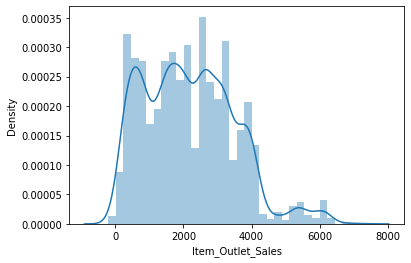

In [ ]:
subm.Item_Outlet_Sales=pred

sns.distplot(subm.Item_Outlet_Sales)
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

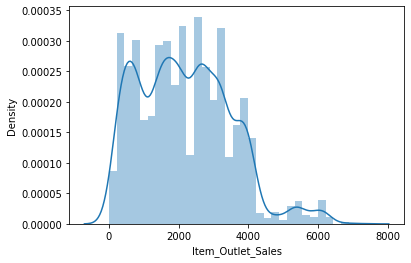

In [ ]:
subm[subm.Item_Outlet_Sales<0]=0
sns.distplot(subm.Item_Outlet_Sales)
plt.show

In [ ]:
pd.DataFrame(subm,columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv("/content/sample_submission.csv")